<a href="https://colab.research.google.com/github/lenaphamthi/bai_tap_thong_ke/blob/main/XSTK_KiemDinhPhiThamSo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#khai báo các thư viện cần thiết 
import scipy.stats as ss
import numpy as np
import statsmodels.stats as sm
from scipy import stats


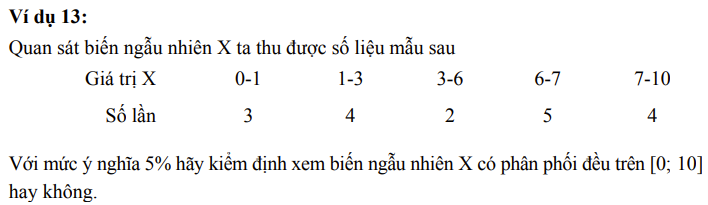

Kiểm định giả thuyết:
$$H_0: \text{X có phân phối đều trên [0, 10]}$$
$$H_a: \text{X không có phân phối đều trên [0, 10]}$$

In [51]:
def uniform_test(data, alpha):
  n = []
  s = []
  p = []
# Tổ chức lại tập dữ liệu
  for i in data.keys():
    n.append(data[i])
    s.append(i)
  k = len(s)
  # Tính các xác suất tương ứng
  for i in range(k):
    temp = (s[i][1] - s[i][0]) / (s[k-1][1] - s[0][0])
    p.append(temp)
  # Tính các tần số lí thuyết
  for i in range(k):
    e.append(sum(n) * p[i])

  test_statistic = 0
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1) # Đã được giải thích ở hình vẽ bên dưới
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0")

In [55]:
data = {(0,1): 3,(1,3): 4,(3,6): 2,(6,7): 5,(7,10): 4}

In [6]:
data = np.random.uniform(size = 20)
ks_statistic, p_value = ss.kstest(data, "uniform")
print("p_value:",p_value)

p_value: 0.5446569355918546


In [5]:
#Kiểm định có phải là phân phối poisson
data = np.random.poisson(10, size = 30)
ks_statistic, p_value = ss.kstest(data, 'poisson', args=(10,0))
print("p_value:",p_value)

p_value: 0.598556492401434


In [7]:
# Kiểm định có phải là phân phối chuẩn
data = np.random.normal(size = 20)
ss.shapiro(data)

(0.9282125234603882, 0.1426498144865036)

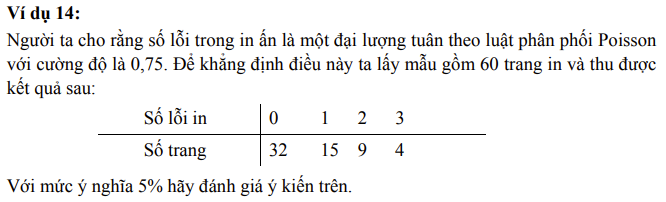

Kiểm định giả thuyết:
$$H_0: \text{X có phân phối Poisson với tham số 0.75}$$
$$H_a: \text{X không có phân phối Poisson với tham số 0.75}$$

In [68]:
def poisson_test(data, lma, alpha):
  n = []
  s = []
  p = []
  e = []
  for i in data.keys():
    s.append(i)
    n.append(data[i])
  k = len(s)
  for i in range(k-1):
    p.append(math.exp(-lma) * (lma ** s[i]) /  math.factorial(s[i]))
  else:
    p.append(1 - sum(p))
  for i in range(k):
    e.append(sum(n) * p[i])
  test_statistic = 0
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1)
  if test_statistic > chi2_stat:
    print("Có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Không có bằng chứng để bác bỏ giả thuyết H0")  

In [66]:
data = {0: 32,1: 15,2: 9,3: 4}

In [69]:
import math
poisson_test(data, 0.75, 0.05)

Không có bằng chứng để bác bỏ giả thuyết H0


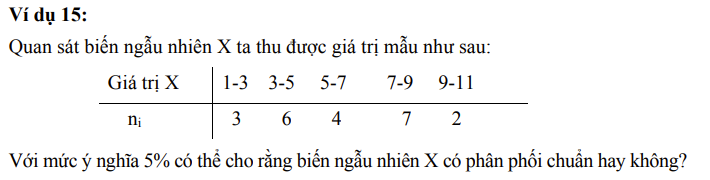

Kiểm định giả thuyết:
$$H_0: X \sim N(\mu, \sigma^2)$$
$$H_a: X \nsim N(\mu, \sigma^2)$$

In [73]:
def norm_test(data, alpha = 0.05):
  temp = []
  n = []
  s = []
  p = [0]
  e = []
  # Tổ chức lại tập dữ liệu
  for i in data.keys():
    n.append(data[i])
    s.append(i)
    for j in range(data[i]):
      temp.append((i[1] + i[0])/2)
  data = temp
  # Tính các tham số thông qua mẫu
  mean = np.mean(data)
  std = np.std(data, ddof = 1)
  k = len(n)
  for i in range(k-1):
    temp = stats.norm.cdf(s[i][1], loc = mean, scale = std) - p[i]
    p.append(temp)
  else:
    temp = 1 - stats.norm.cdf(s[i][1], loc = mean, scale = std)
    p.append(temp)
  p.pop(0)
  
  for i in range(k):
    temp = sum(n) * p[i]
    e.append(temp)
  test_statistic = 0
  
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1)
  if test_statistic > chi2_stat:
    print("Có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Không có bằng chứng để bác bỏ giả thuyết H0") 

In [71]:
# Xây dựng dữ liệu
data = {(1,3): 3,(3, 5): 6,(5, 7): 4,(7, 9): 7,(9, 11): 2}

In [74]:
norm_test(data)

Không có bằng chứng để bác bỏ giả thuyết H0


Ví dụ 16:
Có ba nhà máy cùng sản xuất một loại sản phẩm, người ta tiến hành kểm tra sản phẩm
của ba nhà máy thu được số liệu sau:
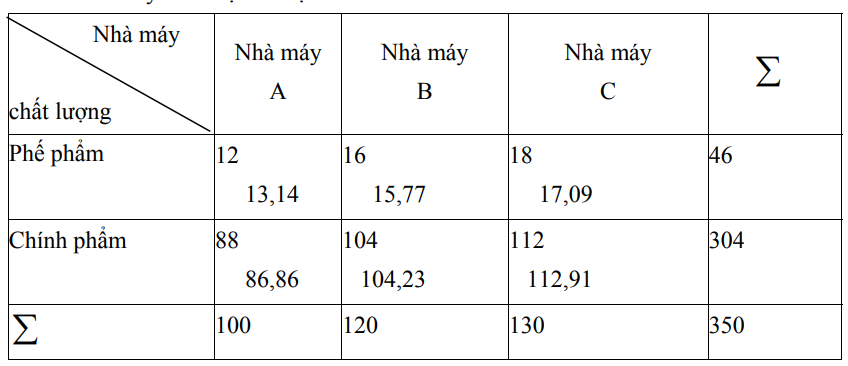

Với mức ý nghĩa 5% có thể cho rằng tỷ lệ phế phẩm của ba nhà máy là như nhau
hay không?

Xây dựng giả thuyết :
$$H_{0}: \text{Tỷ lệ phế phẩm của ba nhà máy là như nhau} $$
$$H_{a}: \text{Tồn tại ít nhất tỷ lệ phế phẩm của ba nhà máy là khác nhau}$$

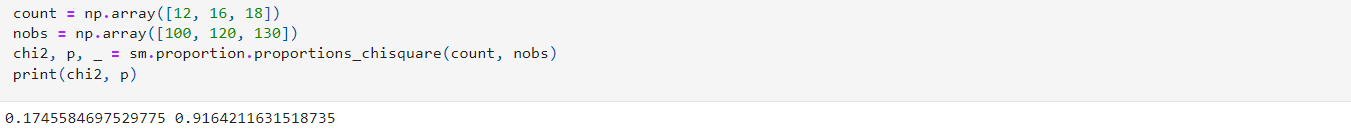

Không có bằng chứng để bác bỏ giả thuyết H0, như vậy tỷ lệ phế phẩm của ba nhà máy là như nhau 

Ví dụ 17:
Nghiên cứu tình trạng hôn nhân trước ngày cưới của 542 cặp vợ chồng ta có bảng
số liệu:
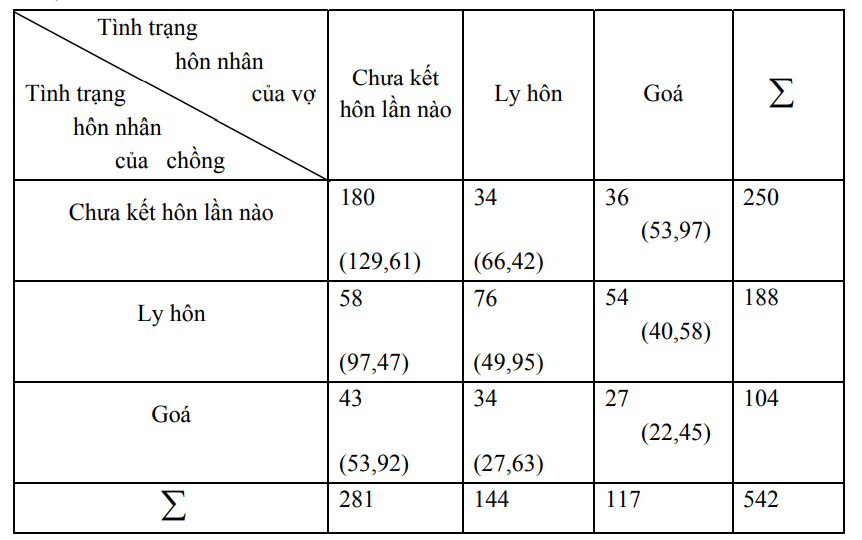

Với mức ý nghĩa 5% có thể cho rằng tình trạng hôn nhân của vợ và chồng là độc lập
với nhau hay không? 

Xây dựng giả thuyết :
$$H_{0}: \text{Tình trạng hôn nhân của vợ và chồng là độc lập nhau} $$
$$H_{a}: \text{Tồn tại ít nhất tình trạng hôn nhân của vợ và chồng không độc lập}$$

In [48]:
data = [[180, 34, 36], [58, 76, 54], [43, 34, 27]]
chi2, p, df, _ = ss.chi2_contingency(data)
print('p_value:',p)
if p < 0.05:
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Không có bằng chứng để bác bỏ giả thuyết H0")

p_value: 1.7402118708109908e-16
Có bằng chứng để bác bỏ giả thuyết H0
